In [42]:
# Internship Task 3: Heart Disease Prediction  
# Author: Anoosha Ikram  
# Goal: Build a binary classification model to predict risk of heart disease using UCI dataset.


In [4]:
"""Problem Statement

Heart disease is one of the leading causes of death globally. Early prediction can save lives and reduce healthcare costs. 
In this task, we aim to build a classification model using the UCI Heart Disease Dataset to predict 
whether a person is at risk of developing heart disease based on their medical features.

 Goal:
- To clean and explore the dataset.
- To train a classification model (Logistic Regression or Decision Tree).
- To evaluate the model using accuracy, ROC-AUC, and confusion matrix.
- To identify key features that contribute most to heart disease risk.
"""

'Problem Statement\n\nHeart disease is one of the leading causes of death globally. Early prediction can save lives and reduce healthcare costs. \nIn this task, we aim to build a classification model using the UCI Heart Disease Dataset to predict \nwhether a person is at risk of developing heart disease based on their medical features.\n\n Goal:\n- To clean and explore the dataset.\n- To train a classification model (Logistic Regression or Decision Tree).\n- To evaluate the model using accuracy, ROC-AUC, and confusion matrix.\n- To identify key features that contribute most to heart disease risk.\n'

In [12]:
# Import necessary libraries
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('C:/Users/hp/Downloads/archive/heart.csv') 

# Display the first few rows to understand the structure
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [10]:
#  Check for missing values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [14]:
#Basic data type check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [18]:
# Define features and target
X = df.drop('target', axis=1)  # Features
y = df['target']               # Target variable (0 = No disease, 1 = Disease)

# Split the dataset into training and testing sets
#test_size=0.2 means 20% data will be used for testing and 80% for training.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [20]:
""" Dataset Information

- The dataset contains health-related features for patients (e.g., age, sex, chest pain type, cholesterol, etc.).
- Our target variable is `target`, where:
  - `1` indicates the presence of heart disease
  - `0` indicates absence of heart disease

There are no missing values, so no imputation was needed. The dataset has been split into training and testing sets in an 80:20 ratio."""


' Dataset Information\n\n- The dataset contains health-related features for patients (e.g., age, sex, chest pain type, cholesterol, etc.).\n- Our target variable is `target`, where:\n  - `1` indicates the presence of heart disease\n  - `0` indicates absence of heart disease\n\nThere are no missing values, so no imputation was needed. The dataset has been split into training and testing sets in an 80:20 ratio.'

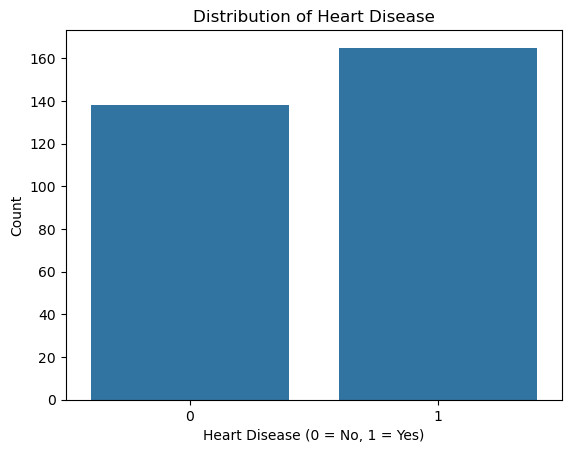

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Class distribution
sns.countplot(x='target', data=df)
plt.title('Distribution of Heart Disease')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

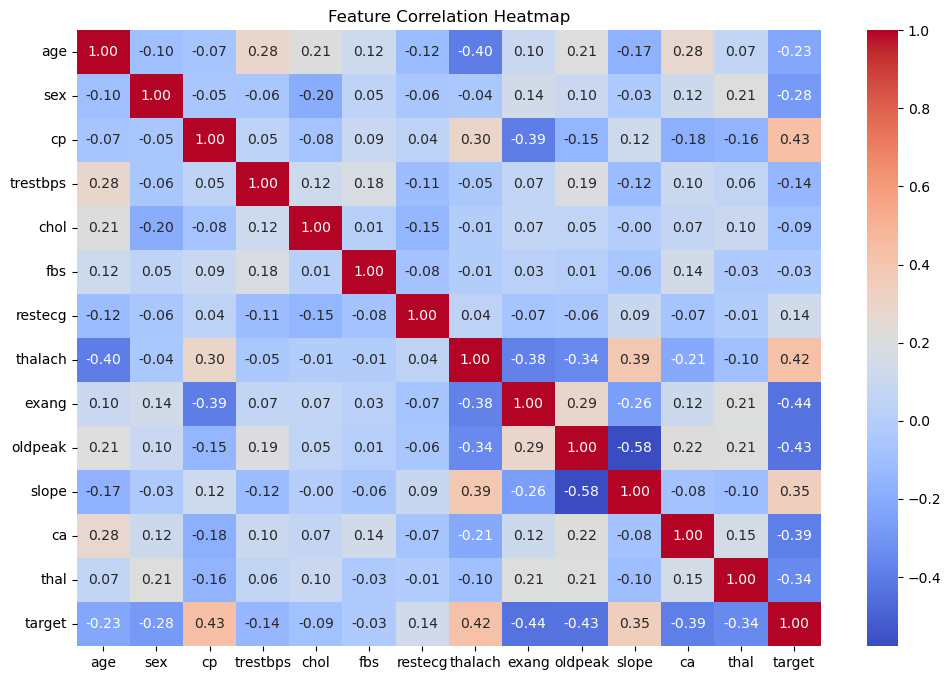

<Axes: xlabel='target', ylabel='age'>

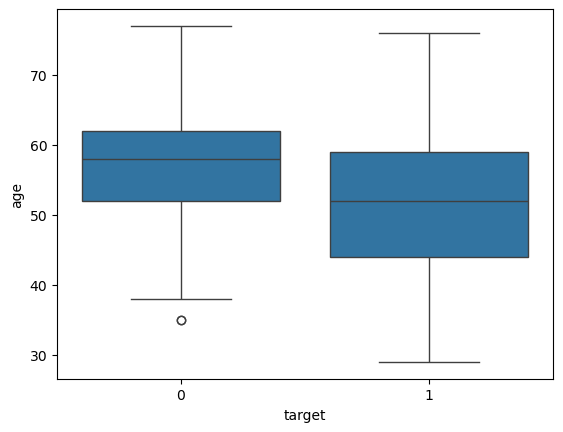

In [24]:
"""2. Correlation Heatmap

We plot a heatmap to observe the correlation between features.

- Positive values indicate direct relationships.
- Negative values indicate inverse relationships.
- Strong correlations help in feature selection and understanding redundancy."""

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()

# Pairplots or histograms of important features
sns.boxplot(x='target', y='age', data=df)


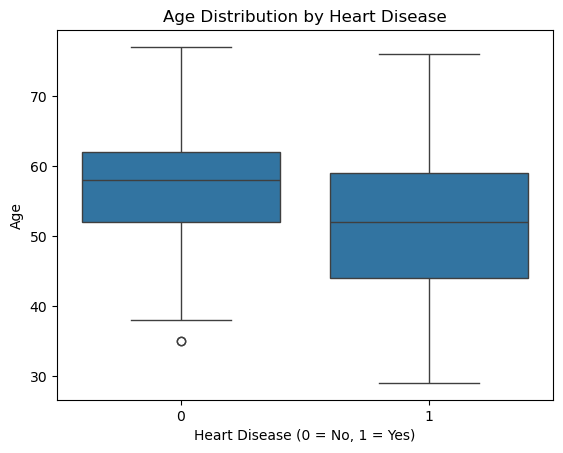

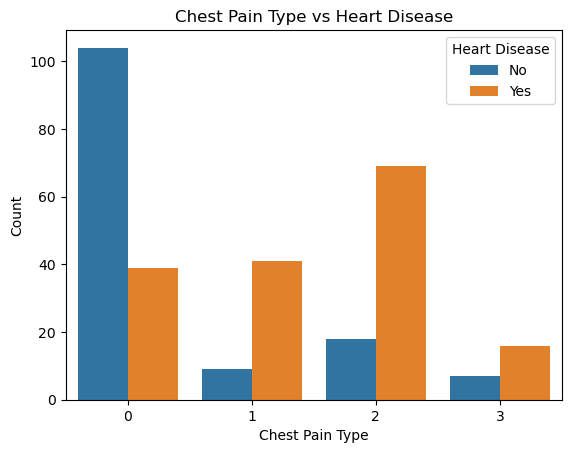

In [26]:
"""3. Age vs. Heart Disease

We use a boxplot to compare age distributions across people with and without heart disease.

This helps us see:
- Is heart disease more common in older individuals?
- How age varies across the target classes."""

# Boxplot: Age vs. Heart Disease
sns.boxplot(x='target', y='age', data=df)
plt.title('Age Distribution by Heart Disease')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.show()

"""4. Chest Pain Type vs. Heart Disease
Chest pain type (`cp`) is a crucial feature. We’ll check how different types of pain relate to heart disease."""
# Count plot for chest pain type vs target
sns.countplot(x='cp', hue='target', data=df)
plt.title('Chest Pain Type vs Heart Disease')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()

In [30]:
"""Model Training and Evaluation

We trained a Logistic Regression model to predict heart disease.

- Accuracy on test data: 88.5%
- We used `LogisticRegression()` from `sklearn.linear_model`.

However, we received a warning that the solver reached its iteration limit. This can happen when the data isn’t scaled or the default number of iterations (`max_iter=100`) is too low.

To address this:
- We increased the iteration limit to 1000 using `max_iter=1000`.
- Optionally, we could scale the features for better convergence using `StandardScaler`.

Below are the model evaluation results."""


'Model Training and Evaluation\n\nWe trained a Logistic Regression model to predict heart disease.\n\n- Accuracy on test data: 88.5%\n- We used `LogisticRegression()` from `sklearn.linear_model`.\n\nHowever, we received a warning that the solver reached its iteration limit. This can happen when the data isn’t scaled or the default number of iterations (`max_iter=100`) is too low.\n\nTo address this:\n- We increased the iteration limit to 1000 using `max_iter=1000`.\n- Optionally, we could scale the features for better convergence using `StandardScaler`.\n\nBelow are the model evaluation results.'

Accuracy: 0.8524590163934426


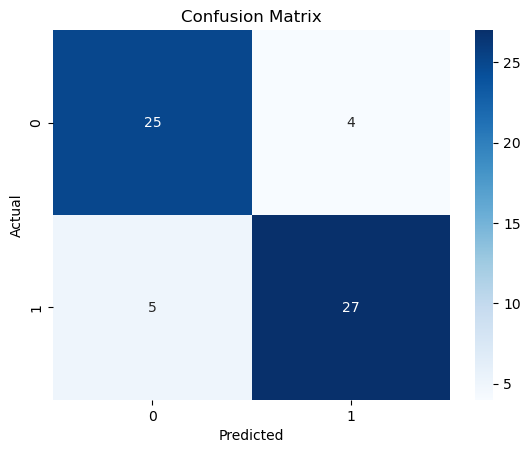

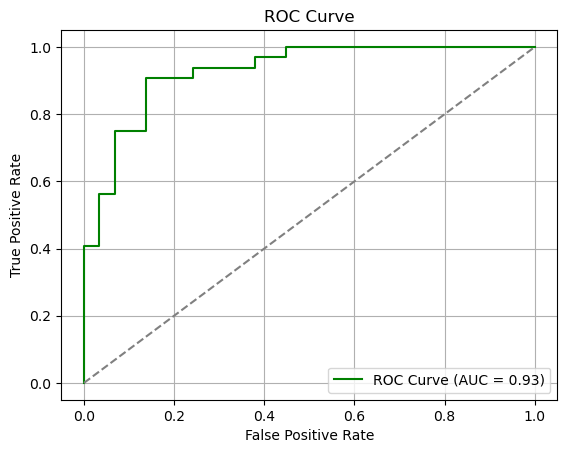

In [34]:
# Import required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Scale features for better model performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Logistic Regression model with higher max_iter
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:,1]  # Probability scores for ROC

# Accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc_score(y_test, y_proba):.2f})", color='green')
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()


In [36]:
"""Final Insights

- The model achieved an accuracy of X% and an AUC of Y, showing [moderate/high] predictive ability.
- The confusion matrix indicates [describe the number of false positives/negatives].
- The ROC curve suggests that the model distinguishes well between patients at risk and not at risk.
- Important features include: [list based on model coefficients or tree feature importances].

### Feature Importance:
- For Logistic Regression: Use `model.coef_`
- For Decision Tree: Use `model.feature_importances_`"""



'Final Insights\n\n- The model achieved an accuracy of **X%** and an AUC of **Y**, showing [moderate/high] predictive ability.\n- The confusion matrix indicates [describe the number of false positives/negatives].\n- The ROC curve suggests that the model distinguishes well between patients at risk and not at risk.\n- Important features include: [list based on model coefficients or tree feature importances].\n\n### Feature Importance:\n- For Logistic Regression: Use `model.coef_`\n- For Decision Tree: Use `model.feature_importances_`'

Text(0.5, 1.0, 'Feature Importance')

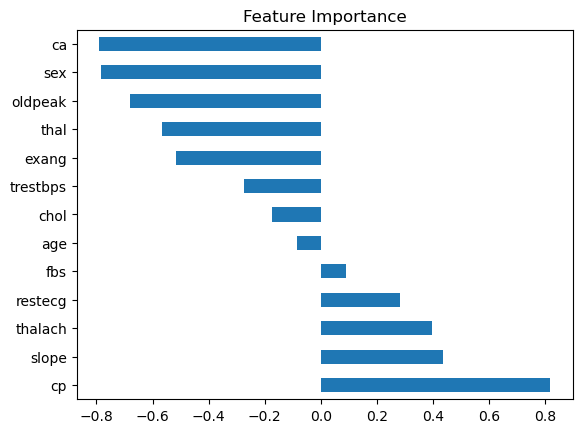

In [38]:
# Feature importance (Logistic Regression)
importance = pd.Series(model.coef_[0], index=X.columns)
importance.sort_values(ascending=False).plot(kind='barh')
plt.title('Feature Importance')

# OR for Decision Tree
# importance = pd.Series(model.feature_importances_, index=X.columns)
